In [24]:
#Cleaning the Data
#Importing modules
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
#Team Stats Cleaning
#Importing Data
TeamStats = pd.read_csv('TeamStats.csv')
teams = TeamStats.drop_duplicates('TEAM')['TEAM']
TeamStats.set_index("TEAM", inplace=True)
#Assigning Each team to their own DF 
Jazz = TeamStats.loc['Utah Jazz']
Spurs = TeamStats.loc['San Antonio Spurs']
Lakers = TeamStats.loc['Los Angeles Lakers']
Sixers = TeamStats.loc['Philadelphia 76ers']
Kings = TeamStats.loc['Sacramento Kings']
Mavericks = TeamStats.loc['Dallas Mavericks']
Bucks = TeamStats.loc['Milwaukee Bucks']
Suns = TeamStats.loc['Phoenix Suns']
Heat = TeamStats.loc['Miami Heat']
Blazers = TeamStats.loc['Portland Trail Blazers']
Knicks = TeamStats.loc['New York Knicks']
Sixers = TeamStats.loc['Philadelphia 76ers']
Kings = TeamStats.loc['Sacramento Kings']
Mavericks = TeamStats.loc['Dallas Mavericks']
Timberwolves = TeamStats.loc['Minnesota Timberwolves']
Raptors = TeamStats.loc['Toronto Raptors']
Hornets = TeamStats.loc['Charlotte Hornets']
Rockets = TeamStats.loc['Houston Rockets']
Sonics = TeamStats.loc['Seattle SuperSonics']
Magic = TeamStats.loc['Orlando Magic']
Pacers = TeamStats.loc['Indiana Pacers']
Nuggets = TeamStats.loc['Denver Nuggets']
Celtics = TeamStats.loc['Boston Celtics']
Pistons = TeamStats.loc['Detroit Pistons']
LosClippers = TeamStats.loc['Los Angeles Clippers']
Cavs = TeamStats.loc['Cleveland Cavaliers']
Nets = TeamStats.loc['New Jersey Nets']
Knicks = TeamStats.loc['New York Knicks']
Hawks = TeamStats.loc['Atlanta Hawks']
VGrizz = TeamStats.loc['Vancouver Grizzlies']
Wizards = TeamStats.loc['Washington Wizards']
Warriors = TeamStats.loc['Golden State Warriors']
Bulls = TeamStats.loc['Chicago Bulls']
MGrizz = TeamStats.loc['Memphis Grizzlies']
NolaHornets = TeamStats.loc['New Orleans Hornets']
CBobcats = TeamStats.loc['Charlotte Bobcats']
OKHornets = TeamStats.loc['New Orleans/Oklahoma City Hornets']
ThunderO = TeamStats.loc['Oklahoma City Thunder']
Nets = TeamStats.loc['Brooklyn Nets']
OPelicans = TeamStats.loc['New Orleans Pelicans']
LAClippers = TeamStats.loc['LA Clippers']
ChaHornets = TeamStats.loc['Charlotte Hornets']
#Combining Franchises that have moved to their current Location
Pelicans = pd.concat([OPelicans,OKHornets,NolaHornets])
Pelicans = Pelicans.sort_values(by='YR')
Grizz = pd.concat([VGrizz,MGrizz])
Grizz = Grizz.sort_values(by = 'YR')
Clippers = pd.concat([LosClippers,LAClippers])
Clippers = Grizz.sort_values(by = 'YR')
Hornets = pd.concat([ChaHornets,CBobcats])
Hornets = Hornets.sort_values(by = 'YR')
Thunder = pd.concat([ThunderO , Sonics])
Thunder = Thunder.sort_values(by = "YR")

In [25]:
#Cleaning the Player data
Players = pd.read_csv('PlayerStats.csv')
players = []
players = Players['PLAYER']
players.drop_duplicates()
Players.set_index("PLAYER", inplace=True)
i = 0 
#Creating a Tuple of players where each player has their yearly stats under their name
playerTup = {}
for index, row in Players.iterrows():
    if index in playerTup:
        continue
    else:
        curr = Players.loc[index]
        playerTup[index] = (index,curr)
playerTup['LeBron James'][1]

,Unnamed: 0,YR,TEAM,AGE,GP,W,L,MIN,PTS,FGM,...,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PM
PLAYER,,,,,,,,,,,,,,,,,,,,,
LeBron James,1323,2003-04,CLE,19,79,33,46,39.6,20.9,7.9,...,5.5,5.9,3.5,1.6,0.7,1.9,40.0,12,0,-1.8
LeBron James,2217,2005-06,CLE,21,79,47,32,42.5,31.4,11.1,...,7.0,6.6,3.3,1.6,0.8,2.3,53.6,21,5,3.5
LeBron James,2677,2006-07,CLE,22,78,47,31,40.9,27.3,9.9,...,6.7,6.0,3.2,1.6,0.7,2.2,48.2,16,1,4.8
LeBron James,3131,2007-08,CLE,23,75,45,30,40.4,30.0,10.6,...,7.9,7.2,3.4,1.8,1.1,2.2,55.6,31,7,1.8
LeBron James,3583,2008-09,CLE,24,81,66,15,37.7,28.4,9.7,...,7.6,7.2,3.0,1.7,1.1,1.7,53.9,29,7,10.8
LeBron James,4028,2009-10,CLE,25,76,60,16,39.0,29.7,10.1,...,7.3,8.6,3.4,1.6,1.0,1.6,55.8,31,4,8.6
LeBron James,4470,2010-11,MIA,26,79,57,22,38.8,26.7,9.6,...,7.5,7.0,3.6,1.6,0.6,2.1,49.2,31,4,7.8
LeBron James,4923,2011-12,MIA,27,62,45,17,37.5,27.1,10.0,...,7.9,6.2,3.4,1.9,0.8,1.5,50.6,23,0,7.6
LeBron James,5402,2012-13,MIA,28,76,61,15,37.9,26.8,10.1,...,8.0,7.3,3.0,1.7,0.9,1.4,52.1,36,4,9.5


In [34]:
#Cleaning Contract Data
Contracts = pd.read_csv('PlayerContracts_raw.csv')
Contracts.set_index('NAME', inplace=True)
Contracts
conTuple = {}
for index, row in Contracts.iterrows():
    if index in conTuple:
        continue
    else:
        curr = Contracts.loc[index]
        conTuple[index] = (index,curr)
print('Done')
conTuple['LeBron James'][1]

Done


,Unnamed: 0,YR,RK,POS,TEAM,SALARY
NAME,,,,,,
LeBron James,1401,2005-2006Season:,129,SF,Cleveland Cavaliers,4621800.0
LeBron James,1792,2006-2007Season:,104,SF,Cleveland Cavaliers,5828089.0
LeBron James,2079,2007-2008Season:,31,SF,Cleveland Cavaliers,13041250.0
LeBron James,2494,2008-2009Season:,28,SF,Cleveland Cavaliers,14410581.0
LeBron James,2901,2009-2010Season:,22,SF,Cleveland Cavaliers,15779912.0
LeBron James,3322,2010-2011Season:,22,SF,Miami Heat,14500000.0
LeBron James,3767,2011-2012Season:,14,SF,Miami Heat,17545000.0
LeBron James,4258,2012-2013Season:,8,SF,Miami Heat,19067500.0
LeBron James,4792,2013-2014Season:,9,SF,Miami Heat,19067500.0


In [35]:
#Function to make year name similiar to player data
def concatenate_list_data(list):
    result= ''
    for element in list:
        result += str(element)
    return result
#Combining player and contract data
newTup = {}
#Changes players that only had one year to frame as opposed to series
for player in conTuple:
    if isinstance(conTuple[player][1], pd.DataFrame):
        newTup[player] = (player,conTuple[player][1])
    else:
        newTup[player] = (player,conTuple[player][1].to_frame().transpose())
#Creates a new column of a year string to match player data 
matchTup = {}
for player in newTup:
    YearStr = newTup[player][1]['YR']
    currentFrame = newTup[player][1]
    matchingYR = []
    for year in YearStr:
        currStr = [year[0:5],year[7:9]]
        a  = str(concatenate_list_data(currStr))
        matchingYR.append(a)
    currentFrame['Match'] = matchingYR
    matchTup[player] = (player,currentFrame)
print('I am done')


C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


I am done


In [36]:
matchTup['Allen Iverson'][1]

,Unnamed: 0,YR,RK,POS,TEAM,SALARY,Match
NAME,,,,,,,
Allen Iverson,1238,2005-2006Season:,4,SG,Philadelphia 76ers,16453125.0,2005-06
Allen Iverson,1639,2006-2007Season:,7,SG,Philadelphia 76ers,17184375.0,2006-07
Allen Iverson,2055,2007-2008Season:,7,SG,Denver Nuggets,19012500.0,2007-08
Allen Iverson,2472,2008-2009Season:,6,SG,Detroit Pistons,20840625.0,2008-09
Allen Iverson,2938,2009-2010Season:,379,SG,Memphis Grizzlies,650686.0,2009-10
Allen Iverson,3378,2010-2011Season:,398,SG,Philadelphia 76ers,650686.0,2010-11
Allen Iverson,3859,2011-2012Season:,426,SG,Philadelphia 76ers,650686.0,2011-12
Allen Iverson,4384,2012-2013Season:,454,SG,Philadelphia 76ers,650686.0,2012-13


In [37]:
finalTup = {}
#Combining the players raw stats with the corresponding salaries for that year
for player in playerTup:
    Sal = []
    years = playerTup[player][1]['YR']
    if player in matchTup:
        salYears = matchTup[player][1]['Match'].tolist()
        i = 0 
        for year in years:
            if i >= len(salYears):
                Sal.append(0)
            elif year == salYears[i]:
                salAdds = matchTup[player][1]['SALARY'].tolist()
                Sal.append(salAdds[i])
                i += 1
            else:
                Sal.append(0)
    else :
        continue
 
         
    finFrame = playerTup[player][1]
    finFrame['Sal'] = Sal
    finalTup[player] = (player,finFrame)
print('I am done')

C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


I am done


In [79]:
#initializing data frame of stats and salary data without zero values
playerStats = pd.DataFrame(columns = list(finalTup['Allen Iverson'][1].columns.values))
#Changes players that only had one year to frame as opposed to series
newFinalTup = {}
for player in finalTup:
    if isinstance(finalTup[player][1], pd.DataFrame):
        newFinalTup[player] = (player,finalTup[player][1])
    else:
        newFinalTup[player] = (player,finalTup[player][1].to_frame().transpose())
#Goes through each player in the tuple and adds their data to the player stats frame
for player in newFinalTup:
    currFrame = newFinalTup[player][1]
    playerStats = playerStats.append(currFrame)
#Getting rid of data that has no salary correspnding to it
mask = playerStats['Sal'] != 0
playerStats = playerStats[mask]
print('done')
playerStats.info()



done
<class 'pandas.core.frame.DataFrame'>
Index: 5415 entries, Allen Iverson to Malcolm Miller
Data columns (total 30 columns):
Unnamed: 0    5415 non-null object
YR            5415 non-null object
TEAM          5415 non-null object
AGE           5415 non-null object
GP            5415 non-null object
W             5415 non-null object
L             5415 non-null object
MIN           5415 non-null object
PTS           5415 non-null object
FGM           5415 non-null object
FGA           5415 non-null object
FG_per        5415 non-null object
TPM           5415 non-null object
TPA           5415 non-null object
TP_per        5415 non-null object
FTM           5415 non-null object
FTA           5415 non-null object
FT_per        5415 non-null object
OREB          5415 non-null object
DREB          5415 non-null object
REB           5415 non-null object
AST           5415 non-null object
TOV           5415 non-null object
STL           5415 non-null object
BLK           5415 non-null obj

In [81]:
#Changing to correct data types
playerStats['AGE']= playerStats['AGE'].astype('int32') 
playerStats['AST']= playerStats['AST'].astype('float') 
playerStats['BLK']= playerStats['BLK'].astype('float') 
playerStats['DD2']= playerStats['DD2'].astype('int32') 
playerStats['DREB']= playerStats['DREB'].astype('float') 
playerStats['FGA']= playerStats['FGA'].astype('float') 
playerStats['FGM']= playerStats['FGM'].astype('float')
playerStats['FG_per']= playerStats['FG_per'].astype('float')
playerStats['GP']= playerStats['GP'].astype('int32') 
playerStats['L']= playerStats['L'].astype('int32')
playerStats['MIN']= playerStats['MIN'].astype('float') 
playerStats['OREB']= playerStats['OREB'].astype('float') 
playerStats['PF']= playerStats['PF'].astype('float')
playerStats['PM']= playerStats['PM'].astype('float') 
playerStats['PTS']= playerStats['PTS'].astype('float')
playerStats['REB']= playerStats['REB'].astype('float') 
playerStats['STL']= playerStats['STL'].astype('float')
playerStats['TD3']= playerStats['TD3'].astype('int32') 
playerStats['TOV']= playerStats['TOV'].astype('float') 
playerStats['TPA']= playerStats['TPA'].astype('float') 
playerStats['TP_per']= playerStats['TP_per'].astype('float') 
playerStats['TPM']= playerStats['TPM'].astype('float') 
playerStats['FTM']= playerStats['FTM'].astype('float') 
playerStats['FTA']= playerStats['FTA'].astype('float') 
playerStats['FT_per']= playerStats['FT_per'].astype('float') 
playerStats['W']= playerStats['W'].astype('int32') 
#Some of the Salary datas are weird, so taking them out
for index,row in playerStats.iterrows():
    dType = str(type(row['Sal']))
    dType = dType.replace("<","")
    dType = dType.replace(">","")
    dType = dType.replace("'","")
    dType = dType.replace(" ","")
    dType = dType.replace("class","")
    if dType == 'list' :
        playerStats = playerStats.drop(index)
playerStats['Sal'] = playerStats['Sal'].astype('long')
playerStats.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5193 entries, Allen Iverson to Damyean Dotson
Data columns (total 30 columns):
Unnamed: 0    5193 non-null object
YR            5193 non-null object
TEAM          5193 non-null object
AGE           5193 non-null int32
GP            5193 non-null int32
W             5193 non-null int32
L             5193 non-null int32
MIN           5193 non-null float64
PTS           5193 non-null float64
FGM           5193 non-null float64
FGA           5193 non-null float64
FG_per        5193 non-null float64
TPM           5193 non-null float64
TPA           5193 non-null float64
TP_per        5193 non-null float64
FTM           5193 non-null float64
FTA           5193 non-null float64
FT_per        5193 non-null float64
OREB          5193 non-null float64
DREB          5193 non-null float64
REB           5193 non-null float64
AST           5193 non-null float64
TOV           5193 non-null float64
STL           5193 non-null float64
BLK           5193 non-

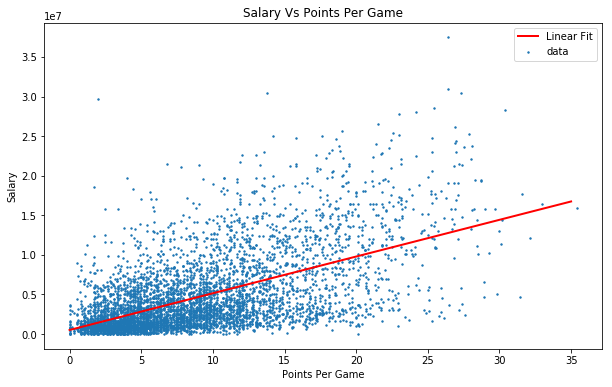

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     2675.
Date:                Sun, 31 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:05:38   Log-Likelihood:                -86121.
No. Observations:                5193   AIC:                         1.722e+05
Df Residuals:                    5191   BIC:                         1.723e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.106e+05   9.56e+04      5.341      0.000    3.23e+05    6.98e+05
PTS         4.638e+05   8966.929     51.718      0.000    4.46e+05    4.81e+05
==============================================================================
Omnibus:                     1310.428   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3988.110
Skew:                           1.292   Prob(JB):                         0.00
Kurtosis:                       6.428   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
import statsmodels.formula.api as sm
import scipy as sc
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 
plt.xlabel('Points Per Game')
plt.ylabel('Salary')
plt.title('Salary Vs Points Per Game')
plt.scatter(x = playerStats['PTS'], y = playerStats['Sal'], s = 2,label='data')
pointsLinearModel = sm.ols(formula="Sal ~ PTS", data=playerStats).fit()
coefs = dict(pointsLinearModel.params)
x = sc.linspace(0,35,1000)
y = coefs["Intercept"] + coefs['PTS']*x
plt.plot(x,y,label="Linear Fit",linewidth=2,color = 'red')
plt.legend()
plt.show()
salaryLinearModel.summary()


In [107]:
multipleStatsModel = sm.ols(formula="Sal ~ PTS + AST  + AGE + GP + W + STL + BLK + MIN", data=playerStats).fit()
multipleStatsModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     615.2
Date:                Sun, 31 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:12:58   Log-Likelihood:                -85467.
No. Observations:                5193   AIC:                         1.710e+05
Df Residuals:                    5184   BIC:                         1.710e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.115e+06    3.4e+05    -26.810      0.000   -9.78e+06   -8.45e+06
PTS         4.497e+05   2.01e+04     22.336      0.000     4.1e+05    4.89e+05
AST         6.765e+05   1.17e+05      5.796      0.000    4.48e+05    9.05e+05
AGE         3.794e+05   1.16e+04     32.758      0.000    3.57e+05    4.02e+05
GP         -2.557e+04   4038.427     -6.332      0.000   -3.35e+04   -1.77e+04
W           2.757e+04   5274.927      5.226      0.000    1.72e+04    3.79e+04
STL         1.794e+06   1.09e+05     16.406      0.000    1.58e+06    2.01e+06
BLK        -3.831e+05   9.58e+04     -3.997      0.000   -5.71e+05   -1.95e+05
MIN        -3.588e+04   1.38e+04     -2.606      0.009   -6.29e+04   -8884.083
==============================================================================
Omnibus:                     1114.910   Durbin-Watson:                   1.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3912.530
Skew:                           1.053   Prob(JB):                         0.00
Kurtosis:                       6.694   Cond. No.                         562.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""